# Belastingen uit matroos

## 1. Voorbeeld met CSV
Lees de configuratie in:

Dit leest een configuratie bestand `belasting_noos_matroos_config.yaml` in. 
```yaml
GlobalVariables:
    rootdir: "data_sets" 
    moments: [-24,0,24,48]  

    LoadsMatroos:
        website: "noos" 
        model: "observed"
        parameters: ["waterlevel"]

DataAdapter: 
    default_options:
        csv:
            delimiter: ","

    BelastingLocaties: 
        type: csv
        path: "belastingen_matroos.csv"
    Waterstanden: 
        type: csv
        path: "waterstanden.csv"

```

In [1]:
from pathlib import Path

from toolbox_continu_inzicht import Config

test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_noos_matroos_config.yaml")
c.lees_config()

Zet de data adapter klaar en geef deze de configuratie mee 

In [2]:
from toolbox_continu_inzicht import DataAdapter

data = DataAdapter(config=c)

Run de module met CSV

In [3]:
from toolbox_continu_inzicht.loads import LoadsMatroos

matroos = LoadsMatroos(data_adapter=data)

In [4]:
matroos.df_in

In [5]:
ds = await matroos.run(input="BelastingLocaties", output="Waterstanden")

In [6]:
df = matroos.df_out

In [7]:
df

,measurement_location_id,measurement_location_code,measurement_location_description,parameter_id,parameter_code,datetime,unit,value,value_type
0,7,hoekvanholland,Hoek van Holland,4724,WATHTE,2024-10-28 15:00:00+00:00,cm,-6.0,meting
1,7,hoekvanholland,Hoek van Holland,4724,WATHTE,2024-10-28 15:10:00+00:00,cm,-12.0,meting
2,7,hoekvanholland,Hoek van Holland,4724,WATHTE,2024-10-28 15:20:00+00:00,cm,-17.0,meting
3,7,hoekvanholland,Hoek van Holland,4724,WATHTE,2024-10-28 15:30:00+00:00,cm,-22.0,meting
4,7,hoekvanholland,Hoek van Holland,4724,WATHTE,2024-10-28 15:40:00+00:00,cm,-26.0,meting
...,...,...,...,...,...,...,...,...,...
583,1,delfzijl,Delfzijl,4724,WATHTE,2024-10-29 14:40:00+00:00,cm,-157.0,meting
584,1,delfzijl,Delfzijl,4724,WATHTE,2024-10-29 14:50:00+00:00,cm,-162.0,meting
585,1,delfzijl,Delfzijl,4724,WATHTE,2024-10-29 15:00:00+00:00,cm,-164.0,meting
586,1,delfzijl,Delfzijl,4724,WATHTE,2024-10-29 15:10:00+00:00,cm,-165.0,verwachting


In [8]:
df_plot = df[df["measurement_location_description"] == "Hoek van Holland"]

In [9]:
import numpy as np  # type: ignore

values_nan = df_plot[df_plot["value"] == -999].index
for val in values_nan:
    df_plot.loc[val, "value"] = np.nan
df_plot = df_plot.set_index("datetime")

<Axes: xlabel='datetime'>

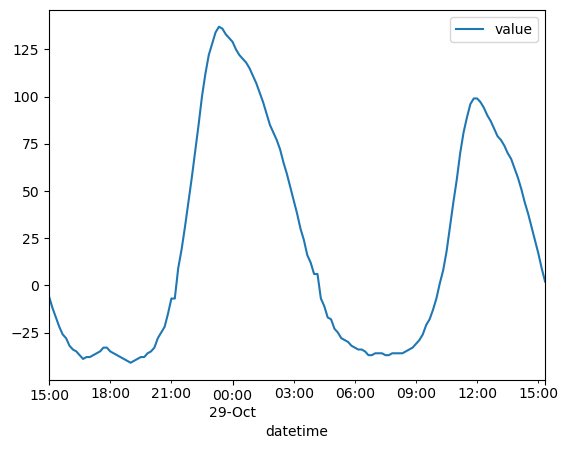

In [10]:
df_plot[["value"]].plot()

### Dit waren alleen metingen, herhaal nu met dataset met ook voorspellingen

Dit leest een configuratie bestand `belasting_noos_matroos_config_fcst.yaml` in. 
```yaml
GlobalVariables:
    rootdir: "data_sets" 
    moments: [-24,0,24,48] 

    LoadsMatroos:
        website: "noos"
        model: "dcsm6_kf"
        parameters: ["waterlevel"]

DataAdapter: 
    default_options:
        csv:
            delimiter: ","

    BelastingLocaties: 
        type: csv
        path: "belastingen_matroos.csv"
    Waterstanden: 
        type: csv
        path: "waterstanden.csv"

```

In [11]:
test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_noos_matroos_fcst_config.yaml")
c.lees_config()
data = DataAdapter(config=c)

matroos_fsct = LoadsMatroos(data_adapter=data)

In [12]:
await matroos_fsct.run(input="BelastingLocaties", output="Waterstanden")

In [13]:
df_fcst = matroos_fsct.df_out
df_plot_fcst = df_fcst[
    df_fcst["measurement_location_description"] == "Hoek van Holland"
]
values_nan = df_plot_fcst[df_plot_fcst["value"] == 999].index
for val in values_nan:
    df_plot_fcst.loc[val, "value"] = np.nan
df_plot_fcst = df_plot_fcst.set_index("datetime")

<Axes: xlabel='datetime'>

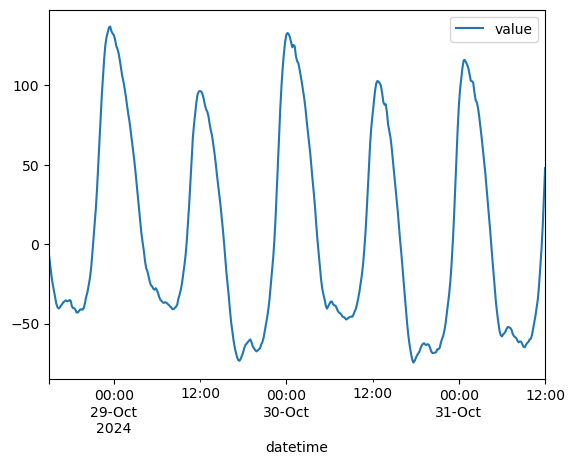

In [14]:
df_plot_fcst[["value"]].plot()

##### vergelijk de twee 

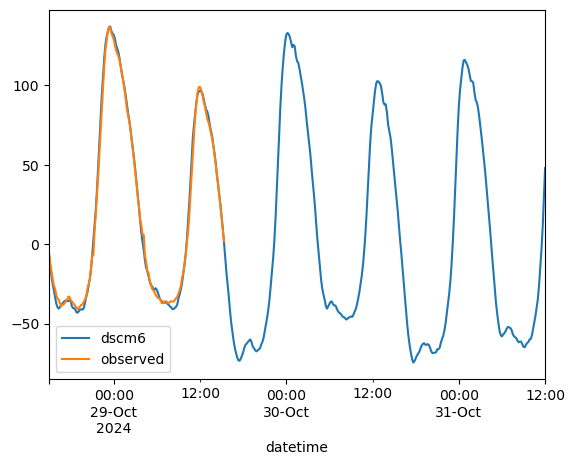

In [15]:
ax = df_plot_fcst[["value"]].plot()
df_plot[["value"]].plot(ax=ax)
ax.legend(["dscm6", "observed"]);

#### werkt ook met vitaal.matroos.rws
werkt alleen als je in de `.env` username & password mee geeft
```yaml
vitaal_user: "..."
vitaal_password: "..."
```

en de website aanpassen

```yaml
LoadsMatroos:
        website: "vitaal" 


```

In [16]:
test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "loads_vitaal_matroos_fcst_config.yaml")
c.lees_config()
data = DataAdapter(config=c)

vitaal_fsct = LoadsMatroos(data_adapter=data)

In [17]:
await vitaal_fsct.run(input="BelastingLocaties", output="Waterstanden")

In [20]:
df_vitaal_fcst = vitaal_fsct.df_out
df_plot_vitaal = df_vitaal_fcst[
    df_vitaal_fcst["measurement_location_description"] == "Hoek van Holland"
]
values_nan = df_plot_vitaal[df_plot_vitaal["value"] == 999].index
for val in values_nan:
    df_plot_vitaal.loc[val, "value"] = np.nan
df_plot_vitaal = df_plot_vitaal.set_index("datetime")

in dit geval indentiek:

<Axes: xlabel='datetime'>

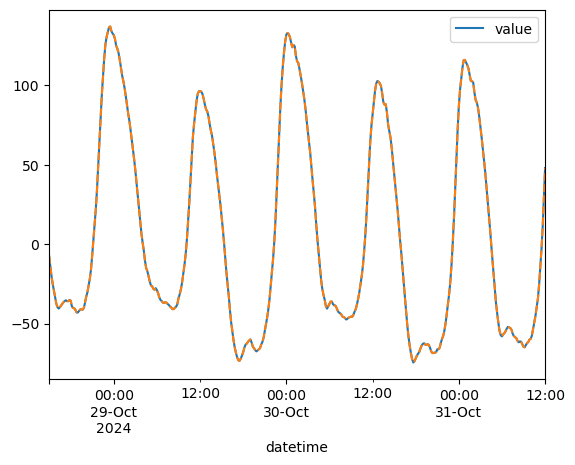

In [21]:
ax = df_plot_fcst[["value"]].plot()
df_plot_vitaal["value"].plot(ls="--", ax=ax)

In [22]:
from toolbox_continu_inzicht.loads import get_matroos_locations

In [23]:
gdf = await get_matroos_locations(parameter="waterlevel", source="dcsm6_kf")

In [24]:
gdf

,geometry,measurement_location_id,measurement_location_code
0,POINT Z (3.81011 55.39894 0),511,A121
1,POINT Z (-2.07333 57.14333 0),38,Aberdeen
2,POINT Z (0.78556 57.26056 0),111,anasuria
3,POINT Z (3.29 51.36278 0),2160,appelzak
4,POINT Z (2.06556 56.39972 0),48,Aukfield platform
...,...,...,...
176,POINT Z (6.65388 53.56998 0),1879,Eemsboei 17
177,POINT Z (6.79509 53.50673 0),1880,Eemsboei 27
178,POINT Z (6.83702 53.48027 0),1881,Eemsboei 30
179,POINT Z (7.00684 53.32695 0),1882,Eemsboei 51


In [25]:
from toolbox_continu_inzicht.loads.loads_matroos.get_matroos_locations import (
    get_matroos_models,
)

In [26]:
df = await get_matroos_models()

In [27]:
df[["source_label"]]

,source_label
0,bma2_05
1,bma2_25
2,bma2_50
3,bma2_75
4,bma2_95
...,...
178,wdij_wind
179,wind_dsc_wdij
180,zeedelta_v1
181,swan_zuno
